In [2]:
#%config InlineBackend.figure_format = 'retina'
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import seaborn as sns

from matplotlib.patches import Patch
from glob import glob
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from matplotlib.lines import Line2D
from collections import OrderedDict
from matplotlib.ticker import MaxNLocator
from tqdm import tqdm
import warnings
  
from matplotlib import rc

rc('font', **{'family': 'sans-serif', 'sans-serif': 'cm'})
rc('text', **{'usetex': True,
              'latex.preamble': r'\renewcommand{\familydefault}{\sfdefault}'
              r' \usepackage{sansmath} \sansmath'})
rc('figure', **{'dpi': 200})
  



In [3]:
results = pd.read_json('workspace/ablation-bsgp-priors/ablation-bsgp-priors.json')

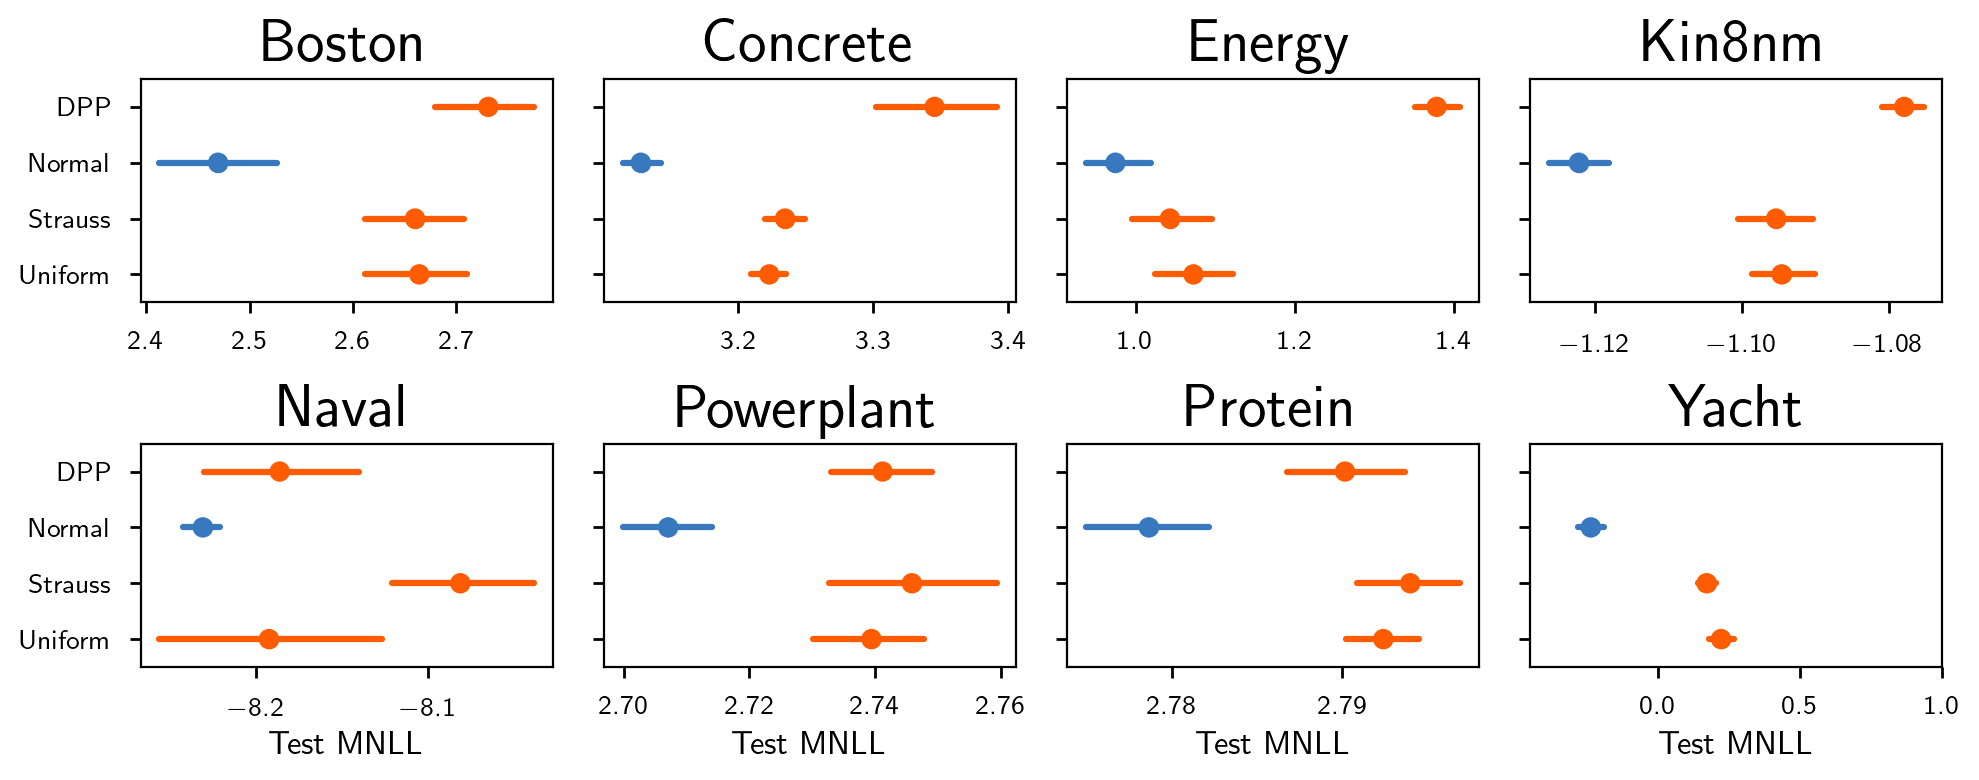

In [5]:
fig, axs = plt.subplots(2, 4, figsize=[10, 4], ); axs = axs.reshape(-1)
colors = ["bright orange", "windows blue", "bright orange", "bright orange", "bright orange"]
cp = sns.xkcd_palette(colors)

sep = 0.1
xmin = np.array([-.5, .5, 4.5]) + sep
xmax = np.array([.5, 1.5, 5.5]) - sep
for i, dataset_name in enumerate(['boston', 'concrete', 'energy', 'kin8nm', 'naval', 'powerplant', 'protein', 'yacht']):

    sns.pointplot(data=results[(results.dataset == dataset_name) & (results.num_inducing == 100)  & (results.prior_type!='z optim')].sort_values('prior_type'), 
                  linestyles='', alpha=0.4,
                  x='test_mnll', y='prior_type', dodge=.5, ax=axs[i], join=False, ci=65, legend=None, palette=cp )
    __d = results[(results.dataset == dataset_name) & (results.num_inducing == 100)  & (results.prior_type!='z optim')]
    axs[i].plot(__d[__d.prior_type == 'uniform'].test_mnll.mean(), 3,  'o', ms=7, color='xkcd:bright orange')
    axs[i].plot(__d[__d.prior_type == 'strauss'].test_mnll.mean(), 2, 'o', ms=7, color='xkcd:bright orange')
    axs[i].plot(__d[__d.prior_type == 'normal'].test_mnll.mean(), 1, 'o', ms=7, color='xkcd:windows blue')
    axs[i].plot(__d[__d.prior_type == 'ddp'].test_mnll.mean(), 0, 'o', ms=7, color='xkcd:bright orange')
    
    
    axs[i].set_title(dataset_name.capitalize())
    axs[i].margins(0.05, 0)
    axs[i].set_ylabel('')
    axs[i].set_xlabel('')
    axs[i].set_ylim(3.5, -.5)
    axs[i].set_yticklabels(['', '','', ''])
    
    
[axs[i].set_xlabel('Test MNLL') for i in [4, 5, 6, 7]]
[axs[i].set_yticklabels(['DPP', 'Normal', 'Strauss', 'Uniform']) for i in [0, 4]]

axs[-1].set_xlim(axs[-1].get_xlim()[0], 1)

plt.savefig('figures/ablation-bsgp-priors.png', dpi=300)
plt.show()

In [7]:
results = pd.read_json('workspace/ablation-inference/ablation-inference-bsgp.json')
results_sghmc = pd.read_json('workspace/ablation-inference/ablation-inference-sghmc-gp.json')
results_svgp = pd.read_json('workspace/ablation-inference/ablation-inference-svgp.json')

/home/srossi/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


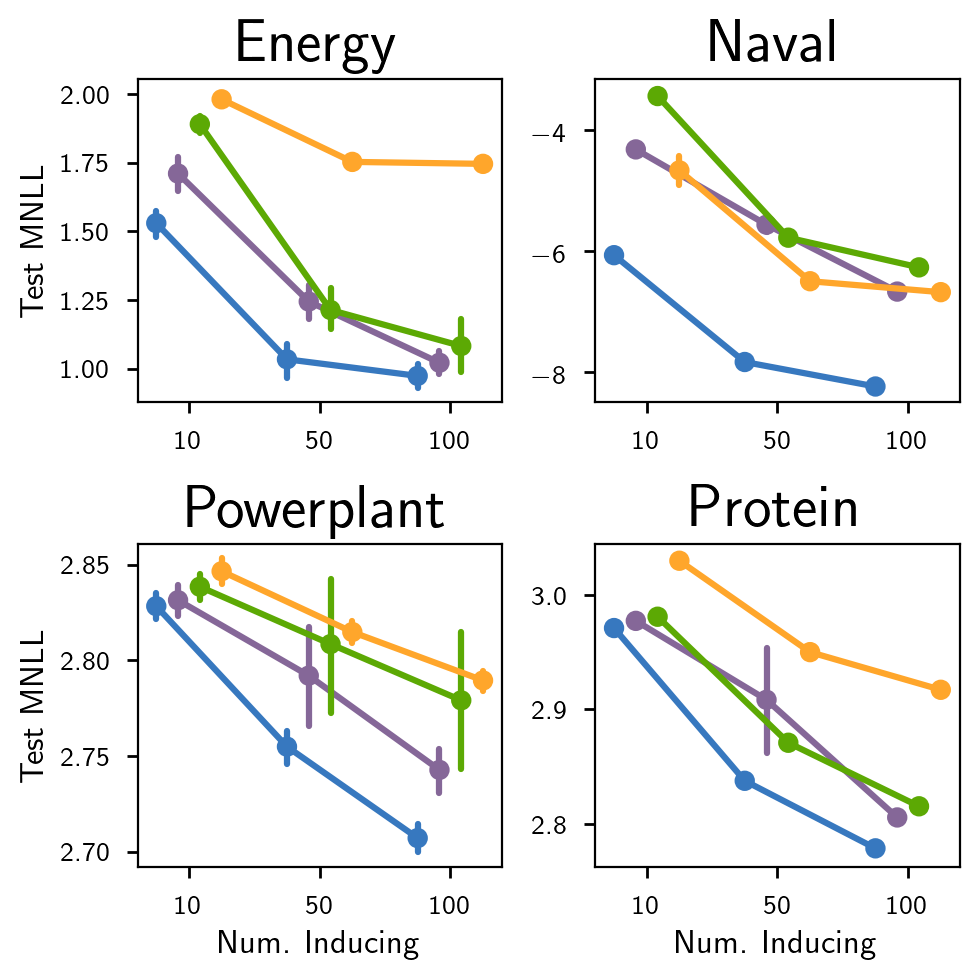

In [10]:
fig, axs = plt.subplots(2, 2, figsize=[5, 5], ); axs = axs.reshape(-1)
colors = ["windows blue", "dark lavender", 'leaf green', "mango"]
cp = sns.xkcd_palette(colors)

sep = 0.1
xmin = np.array([-.5, .5, 1.5]) + sep
xmax = np.array([.5, 1.5, 2.5]) - sep
for i, dataset_name in enumerate(['energy', 'naval', 'powerplant', 'protein']):
    __d = results[(results.dataset == dataset_name) & (results.prior_type == 'normal')]
    __d = __d.append(results[(results.dataset == dataset_name) & (results.prior_type == 'z optim')])
    __d = __d.append(results_svgp[(results_svgp.dataset == dataset_name)])
    __d = __d.append(results_sghmc[(results_sghmc.dataset == dataset_name)])
    sns.pointplot(data=__d, x='num_inducing', linestyles='-', alpha=0.4, hue_order=['svgp', 'sghmc', 'z optim', 'normal'][::-1],
                  y='test_mnll', hue='prior_type', dodge=.5, ax=axs[i], join=True, ci=65, palette=cp, legend=None)
    axs[i].set_title(dataset_name.capitalize())
    axs[i].margins(0.05)
    axs[i].set_ylabel('')
    axs[i].set_xlabel('')
    axs[i].set_xticklabels(['', '', ''])    
    axs[i].legend([],[], frameon=False)
    
[axs[i].set_ylabel('Test MNLL') for i in [0, 2]]
[axs[i].set_xlabel('Num. Inducing') for i in [2, 3]]
[axs[i].set_xticklabels(['10', '50', '100']) for i in [0, 1, 2, 3]]

plt.savefig('figures/ablation-inference.png', dpi=300)
plt.show()

In [12]:
results = pd.read_json('workspace/literature-comparison/literature-comparison-bsgp.json')
results_sghmc = pd.read_json('workspace/literature-comparison/literature-comparison-sghmc-gp.json')
results_svgp = pd.read_json('workspace/literature-comparison/literature-comparison-svgp.json')
results_hensman = pd.read_json('workspace/literature-comparison/literature-comparison-hensman15.json')
results_heterosk = pd.read_json('workspace/literature-comparison/literature-comparison-titsias-heterosk.json')


results = results.append(results_hensman, sort=True)
results = results.append(results_svgp, sort=True)
results = results.append(results_heterosk, sort=True)

results = results[['dataset', 'num_inducing', 'prior_type', 'test_mnll']]
r = results[results['prior_type'].isin(['svgp', 'hensman', 'z optim', 'normal', 'heterosk'])]

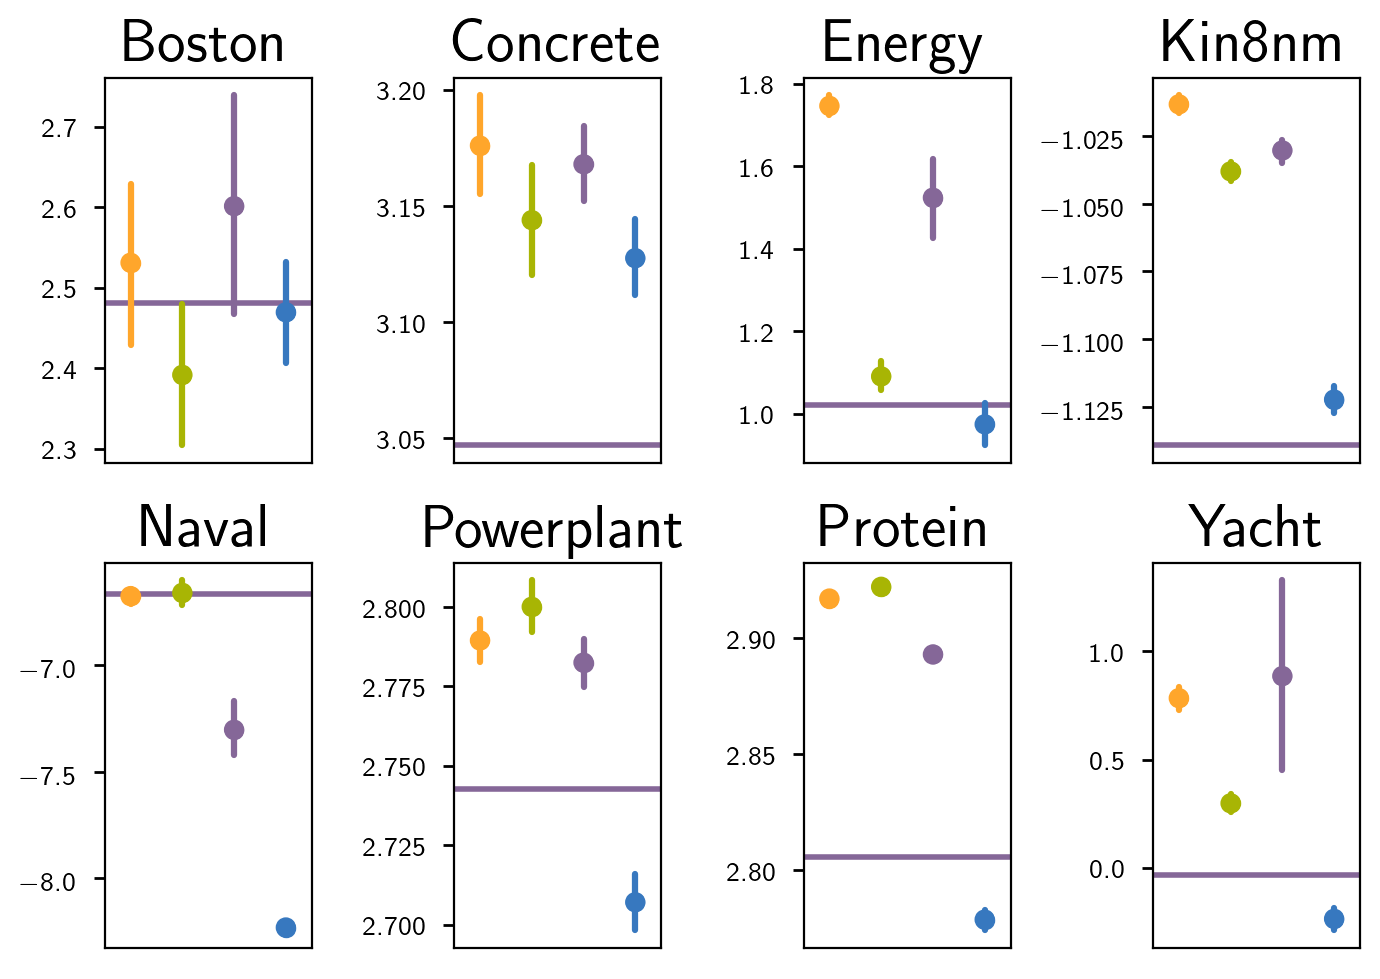

In [13]:
fig, axs = plt.subplots(2, 4, figsize=[7, 5],); axs = axs.reshape(-1)
colors = ['mango', 'mustard green', 'dark lavender', 'windows blue']
cp = sns.xkcd_palette(colors)
order = ['svgp', 'heterosk','hensman',  'normal']
sep = 0.05
xmin = -.5
xmax = 3.5
for i, dataset_name in enumerate(['boston', 'concrete', 'energy', 'kin8nm', 'naval', 'powerplant', 'protein', 'yacht']):
    __d = r[(r.dataset == dataset_name) & (r.prior_type.isin(['svgp', 'hensman', 'normal', 'heterosk']) ) & (r.num_inducing == 100) ]
    sns.pointplot(data=__d, x='prior_type', order=order,
                  linestyles='', alpha=0.4,
                  y='test_mnll', dodge=.5, ax=axs[i], join=False, ci=75, palette=cp, legend=None)
    
    axs[i].plot(0, __d[__d.prior_type == 'svgp'].test_mnll.mean(), 'o', ms=7, color='xkcd:mango', label='SVGP')
    axs[i].plot(1, __d[__d.prior_type == 'heterosk'].test_mnll.mean(), 'o', ms=7, color='xkcd:mustard green', label='heterosk')
    axs[i].plot(2, __d[__d.prior_type == 'hensman'].test_mnll.mean(), 'o', ms=7, color='xkcd:dark lavender', label='hensman')
    axs[i].plot(3, __d[__d.prior_type == 'normal'].test_mnll.mean(), 'o', ms=7, color='xkcd:windows blue', label='BSGP')
    
    axs[i].hlines(results[(results.dataset == dataset_name) &  (results.prior_type == 'z optim') &  (results.num_inducing == 100)].groupby('num_inducing')['test_mnll'].mean(), 
                  xmin, xmax, color='xkcd:dark lavender', lw=2, zorder=0, label='Z optim')    

    axs[i].set_title(dataset_name.capitalize())
    axs[i].legend()
    axs[i].margins(0, 0.05)
    axs[i].set_ylabel('')
    axs[i].set_xlabel('')
    axs[i].set_xticks([])
    axs[i].set_xticklabels([])
    axs[i].legend([],[], frameon=False)
    
plt.savefig('figures/comparison-literatures.png', dpi=300)
plt.show()

In [14]:
results = pd.read_json('workspace/objective-comparison/objective-comparison.json')

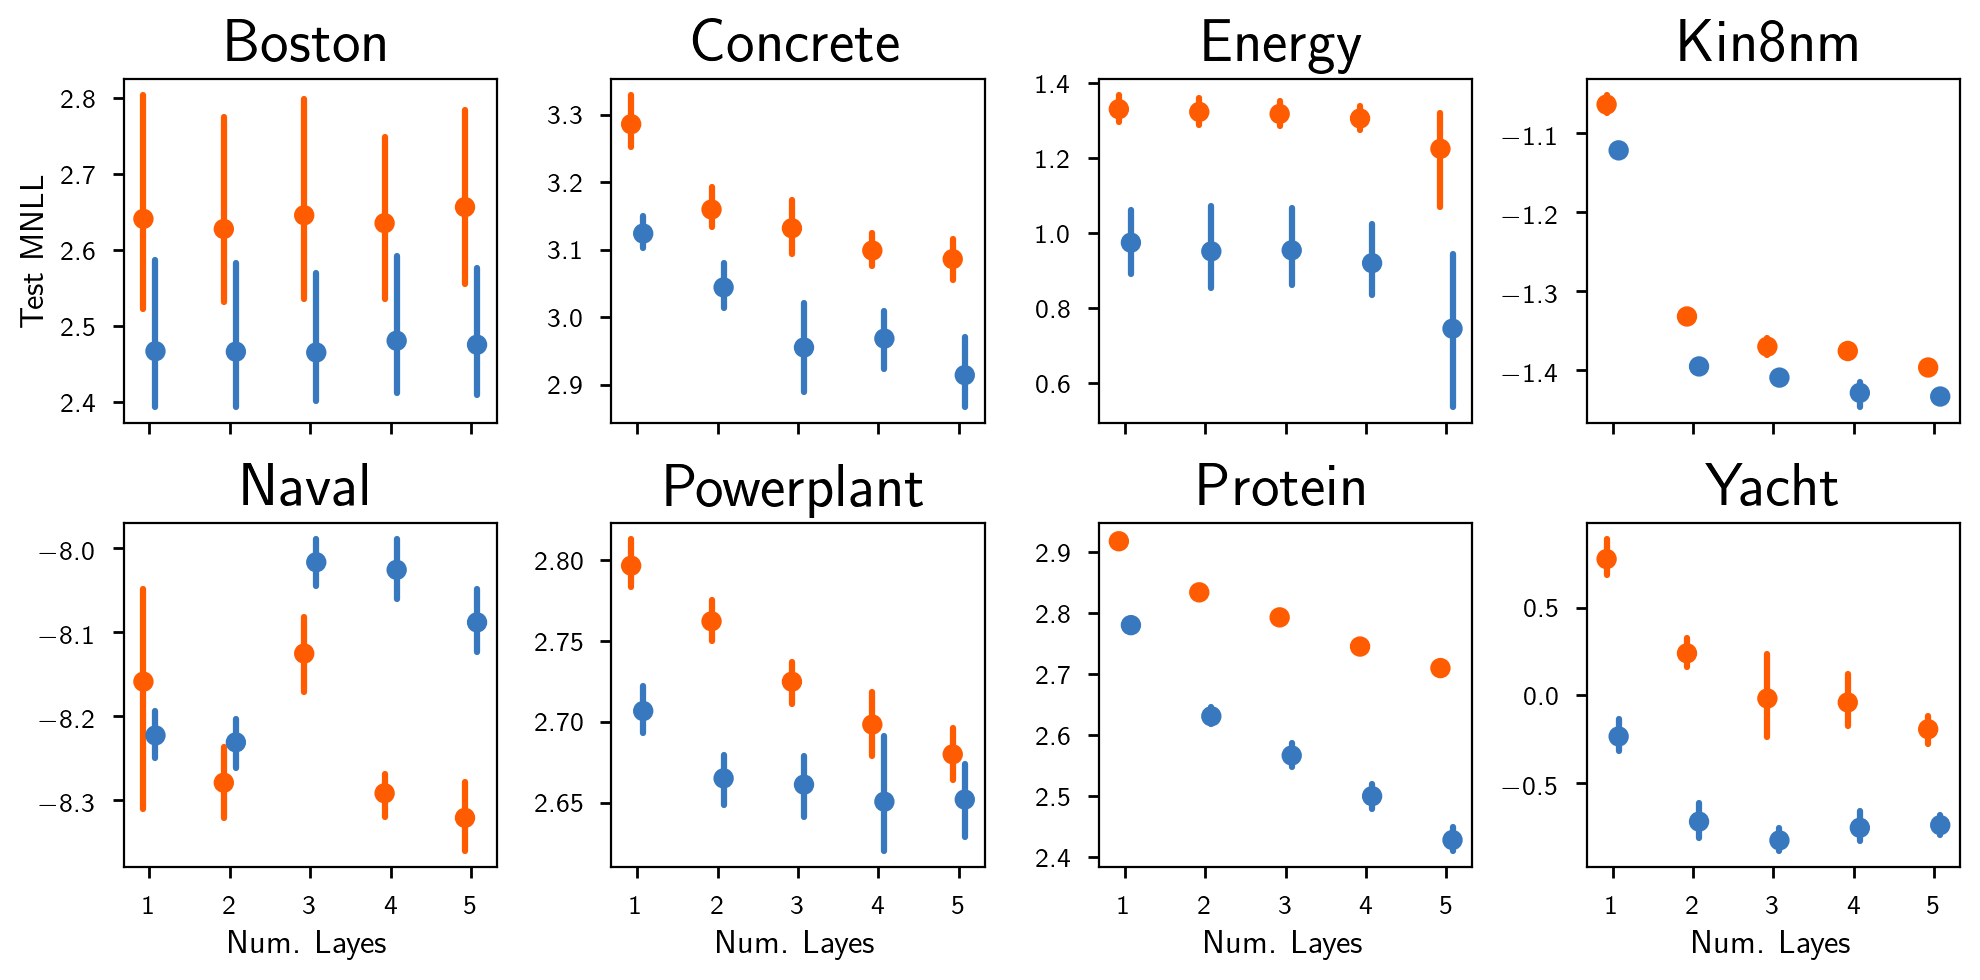

In [15]:
fig, axs = plt.subplots(2, 4, figsize=[10, 5],); axs = axs.reshape(-1)
colors = ['bright orange',  'windows blue']
cp = sns.xkcd_palette(colors)

for i, dataset_name in enumerate(['boston', 'concrete', 'energy', 'kin8nm', 'naval', 'powerplant', 'protein', 'yacht']):
    sns.pointplot(data=results[results.dataset == dataset_name], x='n_layers', 
                  alpha=0.4, hue='objective', 
                  y='test_mnll', dodge=.15, ax=axs[i], join=False, ci=95, palette=cp, legend=False,)
       
    axs[i].set_title(dataset_name.capitalize())
    axs[i].margins(0.05)
    axs[i].set_ylabel('')
    axs[i].set_xlabel('')
    axs[i].set_xticklabels([])
    axs[i].legend([],[], frameon=False)

[axs[i].set_ylabel('Test MNLL') for i in [0]]
[axs[i].set_xlabel('Num. Layes') for i in [ 4, 5, 6, 7]]
[axs[i].set_xticklabels(['1', '2', '3', '4', '5']) for i in [4, 5, 6, 7]]


plt.savefig('figures/comparison-objectives.png', dpi=300)

plt.show()

In [16]:
from scipy import stats
from tqdm import tqdm
wstatistics = pd.DataFrame()
for dataset in tqdm(np.sort(results.dataset.unique())):
    for n_layers in results.n_layers.unique():
        d = results[(results.dataset == dataset) & (results.n_layers == n_layers)][['dataset', 'n_layers', 'objective', 'test_mnll']]
        x = d[d.objective == 'Expectation of log'].test_mnll.values
        y = d[d.objective == 'Log of expectation'].test_mnll.values

        for _ in range(100):
            l = min(len(x), len(y))
            _x = x[np.random.randint(l, size=7)]
            _y = y[np.random.randint(l, size=7)]
            
            _wil = stats.wilcoxon(_x, _y, alternative='greater', zero_method='zsplit').pvalue

            _ttest = stats.ttest_ind_from_stats(_x.mean(), _x.std(), len(_x), _y.mean(), _y.std(), len(_y), equal_var=False).pvalue
            wstatistics = wstatistics.append({'dataset': dataset, 'n_layers': int(n_layers), 'p_value_wilcoxon': _wil, 'p_value_ttest': _ttest}, ignore_index=True)
wstatistics.n_layers = wstatistics.n_layers.astype(int)

  0%|          | 0/8 [00:00<?, ?it/s]/home/srossi/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
100%|██████████| 8/8 [00:12<00:00,  1.51s/it]


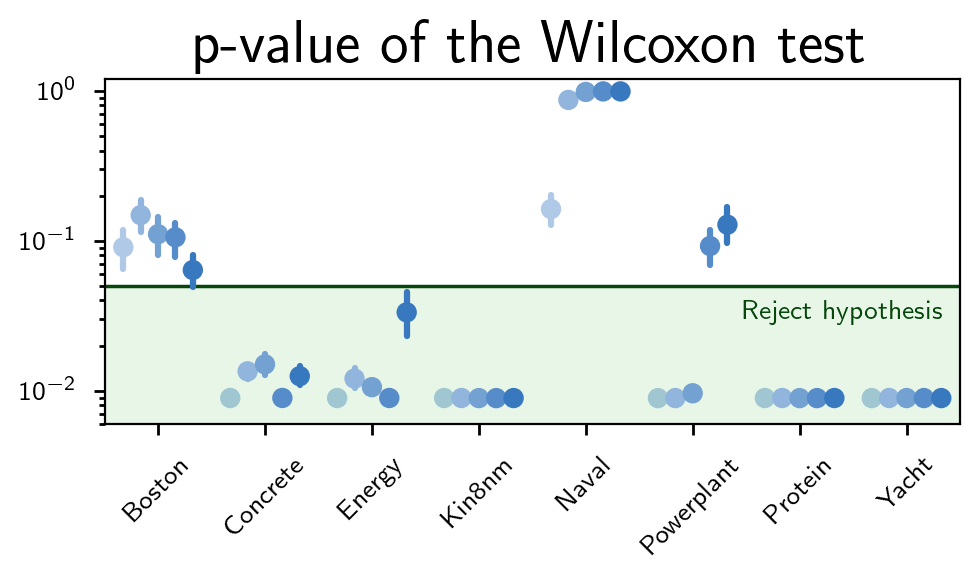

In [17]:
fig, ax = plt.subplots(figsize=[5, 3])
sns.pointplot(data=wstatistics, hue='n_layers', y='p_value_wilcoxon', x='dataset', ax=ax, join=False, dodge=0.65, palette=sns.light_palette("xkcd:windows blue", 7)[2:] )
ax.axhline(0.05, color='xkcd:forest green')
ax.semilogy()
# ax.margins(0.05)
ax.set_ylim(6e-3, 1.2)
plt.xticks(rotation=45)
ax.set_ylabel('')
ax.set_xlabel('')
ax.text(ax.get_xlim()[1], 0.04, 'Reject hypothesis', horizontalalignment='right', verticalalignment='top', color='xkcd:forest green', )
ax.fill_between((-.5, 7.5), 6e-3, 0.05 , color='xkcd:green', alpha=0.1, lw=0)
ax.set_title('p-value of the Wilcoxon test')
ax.legend([],[], frameon=False)
ax.set_xticklabels([d._text.capitalize() for d in ax.get_xticklabels()])

plt.savefig('figures/rank-test-objectives.png', dpi=300)

plt.show()